In [1]:
# pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.4.1'

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
np.set_printoptions(suppress=True)

In [77]:
sample_data = np.load('stock_price_matrix_adjust.npy')
sample_data

array([[[1.11250000e+01, 1.13056002e+01, 1.08332996e+01, 1.10972004e+01,
         4.11902845e+08],
        [1.49099998e+01, 1.52900000e+01, 1.45000000e+01, 1.45400000e+01,
         6.56083570e+08],
        [7.99383020e+00, 7.99383020e+00, 7.99383020e+00, 7.99383020e+00,
         0.00000000e+00],
        ...,
        [3.21000004e+00, 3.21000004e+00, 2.94000006e+00, 2.94000006e+00,
         9.15325140e+07],
        [           nan,            nan,            nan,            nan,
                    nan],
        [           nan,            nan,            nan,            nan,
                    nan]],

       [[1.09582996e+01, 1.13818998e+01, 1.07986002e+01, 1.10068998e+01,
         3.11964681e+08],
        [1.43599997e+01, 1.49899998e+01, 1.40500002e+01, 1.46000004e+01,
         3.34634683e+08],
        [7.99383020e+00, 7.99383020e+00, 7.99383020e+00, 7.99383020e+00,
         0.00000000e+00],
        ...,
        [3.30332994e+00, 3.45667005e+00, 3.23333001e+00, 3.35999990e+00,
        

In [78]:
sample_data.shape

(1463, 299, 5)

In [79]:
technique_indicator = np.load('technique_indicator.npy',allow_pickle=True)
technique_indicator.shape

(1463, 299, 118)

In [80]:
sample_data = np.concatenate((sample_data,technique_indicator),axis=2)
sample_data.shape

(1463, 299, 123)

In [81]:
ad_sample_data=sample_data.copy()
ad_sample_data = ad_sample_data[:,:-2,:]
ad_sample_data.shape

(1463, 297, 123)

In [82]:
#填补空值
ad_sample_data[pd.isna(ad_sample_data)] = 5
ad_sample_data = ad_sample_data[163:,:,:]

In [83]:
#close, high, low, open, volume,118technique_indicator
ad_sample_data.shape

(1300, 297, 123)

In [84]:
#Label的数据
Label_data = ad_sample_data[:,:,0]
Label_data.shape

(1300, 297)

In [85]:
Label_data.shape[0]

1300

In [86]:
# Label_data
Label_data_fixed = np.zeros((Label_data.shape[0],Label_data.shape[1]))

In [87]:
for i in range(Label_data.shape[0]-1):
    for j in range(Label_data.shape[1]):
        Label_data_fixed[i+1][j]=Label_data[i+1][j]-Label_data[i][j]
#         Label_data_fixed[i+1][j]=Label_data_fixed[i+1][j]/abs(Label_data_fixed[i+1][j])

In [88]:
for i in range(Label_data.shape[0]-1):
    for j in range(Label_data.shape[1]):
        if Label_data_fixed[i+1][j]>0:
            Label_data_fixed[i+1][j]=1
        else:
            Label_data_fixed[i+1][j]=0


In [89]:
pd.DataFrame(Label_data_fixed)

,0,1,2,3,4,5,6,7,8,9,...,287,288,289,290,291,292,293,294,295,296
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1296,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1297,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1298,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [90]:
# pd.DataFrame(Label_date_fixed)
Label_data_fixed=np.nan_to_num(Label_data_fixed)

In [91]:
Label_data_fixed.shape

(1300, 297)

In [92]:
p=5

In [93]:
Label_data_2 = Label_data_fixed[p-1:,:]
Label_data_2.shape

(1296, 297)

In [94]:
#input 部分
input_data = ad_sample_data[:,:,1:]
input_data.shape

(1300, 297, 122)

In [95]:
p=5

In [96]:
input_data_final = np.zeros((input_data.shape[0]+1-p,p,input_data.shape[1],input_data.shape[2]))
input_data_final.shape

(1296, 5, 297, 122)

In [97]:
input_data_final[0].shape

(5, 297, 122)

In [98]:
for i in range(input_data.shape[0]+1-p):
    one_line = []
    for j in range(p):
        one_line.append(input_data[i+j])
        
    input_data_final[i] = np.array(one_line)
    

In [99]:
#input 部分
input_data_final.shape

(1296, 5, 297, 122)

In [100]:
N=297
M=1296
P=5
F=122
TEST_SIZE = 0.3 # the test and val size of dataset
RANDOM_STATE = 4

In [101]:
T = np.load('shareholding_relation_adjacent_matrix_tongyi.npy')
T=T[:-2,:-2]
T.shape

(297, 297)

In [102]:
I= np.load('stock_topic_share_graph.npy')
I=I[:-2,:-2]
I.shape

(297, 297)

In [103]:
S=np.load('Pearson_stock_price.npy')
S=S[:-2,:-2]
S.shape

(297, 297)

In [104]:
# T = np.random.normal(size=(N,N))
# I = np.random.normal(size=(N,N))
# S = np.random.normal(size=(N,N))
# I=T
# S=T

In [105]:
Fixed_Matrices = [S,I,T]

In [106]:
samples = input_data_final#np.random.normal(size=(M, P, N, F))
labels = Label_data_2#np.random.normal(size=(M, N))

In [107]:
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.33, random_state=RANDOM_STATE)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(907, 5, 297, 122) (907, 297)
(260, 5, 297, 122) (260, 297)
(129, 5, 297, 122) (129, 297)


In [108]:
x_train = tf.constant(x_train,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
x_test = tf.constant(x_test,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)
x_val = tf.constant(x_val,dtype=tf.float32)
y_val= tf.constant(y_val,dtype=tf.float32)

In [109]:
class GCGRU(tf.keras.Model):
    def __init__(self, N, F, Units_GCN, Units_GRU, Units_FC,
                 Fixed_Matrices, Matrix_Weights, Is_Dyn,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros'):
        super(GCGRU, self).__init__()
        # Number of Nodes
        self.N = N
        # the number of input features
        self.F = F
        # pre-defined matrices: shape=[(N,N),(N,N),(N,N)]
        self.mat = Fixed_Matrices
        # Dynamic Matrix:shape=(N,N)
        self.dyn = self.add_weight(name='w_Dynamic', shape=(self.N, self.N),
                                 initializer=tf.keras.initializers.get(kernel_initializer),
                                 trainable=True)

        
        if Is_Dyn:
            self.mats = self.dyn
        else:
            self.mats = self.add_weight(name='w_Matrices', shape=(self.N, self.N),
                                        initializer=tf.keras.initializers.get(kernel_initializer),
                                        trainable=True)
            for i in range(len(Matrix_Weights)):
                coe = tf.Variable(1.0,trainable=True)
                self.mats = self.mats + Matrix_Weights[i]*self.mat[i]*coe
        
        # GCN_Weights
        self.units_gcn = Units_GCN
        self.w_gcn = []
        self.b_gcn = []
        pre = self.F
        for i in range(len(self.units_gcn)):
            aft = self.units_gcn[i]
            w = self.add_weight(name='w_GCN', shape=(pre, aft),
                                initializer=tf.keras.initializers.get(kernel_initializer),
                                trainable=True)
            self.w_gcn.append(w)
            b = self.add_weight('b_GCN',shape=(aft,),
                                initializer=tf.keras.initializers.get(bias_initializer),
                                trainable=True)
            self.b_gcn.append(b)
            pre = aft
        # GRU_Weights
        self.units_gru = Units_GRU
        self.w_gru = []
        self.b_gru = []
        # the number of output features of Multi-GCN
        C = self.units_gcn[-1]
        F = self.F
        for i in range(len(self.units_gru)-1):
            H = self.units_gru[i]
            pre = F+C+H
            aft = H
            for j in range(3):
                w = self.add_weight(name='w_GRU', shape=(pre,aft),
                                    initializer=tf.keras.initializers.get(kernel_initializer),
                                    trainable=True)
                self.w_gru.append(w)
                b = self.add_weight(name='b_GRU', shape=(aft,),
                                    initializer=tf.keras.initializers.get(bias_initializer),
                                    trainable=True)
                self.b_gru.append(b)
            F = aft
        # the last layer weights
        H = self.units_gru[-2]
        G = self.units_gru[-1]
        w = self.add_weight(name='w_GRU', shape=(H,G),
                            initializer=tf.keras.initializers.get(kernel_initializer),
                            trainable=True)
        
        self.w_gru.append(w)
        b = self.add_weight(name='b_GRU', shape=(G,),
                                 initializer=tf.keras.initializers.get(bias_initializer),
                                 trainable=True)
        self.b_gru.append(b)
        
        # FC_weights
        self.units_fc = Units_FC
        self.w_fc = []
        self.b_fc = []
        pre = G
        for i in range(len(self.units_fc)):
            aft = self.units_fc[i]
            w = self.add_weight(name='w_FC', shape=(pre,aft),
                                initializer=tf.keras.initializers.get(kernel_initializer),
                                trainable=True)
            self.w_fc.append(w)
            b = self.add_weight(name='b_FC', shape=(aft,),
                                initializer=tf.keras.initializers.get(bias_initializer),
                                trainable=True)
            self.b_fc.append(b)
            pre = aft
    
    def Multi_GCN(self, inputs):
        '''
        inputs:shape=(None,P,N,F)
        x_gcn:shape=(None,P,N,C)
        '''
        P = inputs.shape[1]
        x_gcn = []
        for t in range(P):
            # (None, P, N, F) =>(None, N, F)
            xt_gcn = inputs[:,t,:,:]
            
            # (N,N)*(None, N, F)*(F,C)=> (None, N, C)
            for i in range(len(self.units_gcn)):
                xt_gcn = self.mats @ xt_gcn @ self.w_gcn[i] + self.b_gcn[i]
                xt_gcn = tf.nn.tanh(xt_gcn)
            x_gcn.append(xt_gcn)
        # (None,P,N,C)
        x_gcn = tf.stack(x_gcn, axis=1)
        return x_gcn
    
    def GRU(self, x, x_gcn):
        '''
        x:shape=(None,P,N,F)
        x_gcn:shape=(None,N,C)
        x_gru:shape=(None,N,G)
        '''
        # initialize the hidden state in each gru layer
        h_gru = []
        # (None, P, N, F)=>(None, N, F)*(F,H)=> (None, N, H)
        for i in range(len(self.units_gru)-1):
            H = self.units_gru[i]
            h = tf.zeros_like(x[:,0,:,:], dtype=tf.float32) @ tf.zeros([F, H])
            h_gru.append(h)
        
        # all gru layers at each time step
        for t in range(P):
            # (None, P, N, C) =>(None, N, C)
            xt_gcn = x_gcn[:,t,:,:]
            # (None, P, N, F) =>(None, N, F)
            xt = x[:,t,:,:]

            # the i_th layer
            for i in range(len(h_gru)):
                #(None, N, H)
                ht_1 = h_gru[i]
                #(None, N, F)+(None, N, C)+(None, N, H)=> (None, N, C+F+H)
                x_tgh = tf.concat([xt,xt_gcn,ht_1], axis=2)
                #(None, N, C+F+H)=> (None, N, H)
                ut = tf.nn.sigmoid(x_tgh @ self.w_gru[3*i+0] + self.b_gru[3*i+0])
                rt =  tf.nn.sigmoid(x_tgh @ self.w_gru[3*i+1] + self.b_gru[3*i+1])
                
                # (None, N, C+F+H)
                x_tghr = tf.concat([xt, xt_gcn, tf.multiply(rt, ht_1)], axis=2)
                
                # (None, N, H)
                ct = tf.nn.tanh(x_tghr @ self.w_gru[3*i+2] + self.b_gru[3*i+2])
                # (None, N, H)
                ht = tf.multiply(ut, ht_1) + tf.multiply((1-ut), ct)
                # (None, N, H)
                xt = ht
                # (None, N, H)
                h_gru[i]=ht
        # the last layer
        x_gru = tf.nn.sigmoid(ht @ self.w_gru[-1] + self.b_gru[-1])
        return x_gru
    
    def FC(self, x_gru):
        '''
        x_gru:shape=(None, N, G)
        outputs:shape=(None,N,1)
        '''
        x = x_gru
        for i in range(len(self.w_fc)):
            x = x @ self.w_fc[i] + self.b_fc[i]
            x = tf.nn.sigmoid(x)
        # (None, N)
        x_fc = tf.squeeze(x, axis=-1)
        return x_fc

    def build(self, input_shape):
        super().build(input_shape)
        
    def call(self, inputs):
        '''
        inputs:shape=(None,P,N,F)
        x_fc:shape=(None,N)
        '''
        # (None,P,N,C)
        x_gcn = self.Multi_GCN(inputs)
        # (None,N,G)
        x_gru = self.GRU(inputs, x_gcn)
        # (None,N)
        x_fc = self.FC(x_gru)
        return x_fc


In [110]:
Units_GCN = [16,32,64]
Units_GRU = [16,32]
Units_FC = [1]
Matrix_Weights = [1,1,1]
Is_Dyn=False
    
model = GCGRU(N, F, Units_GCN, Units_GRU, Units_FC, Fixed_Matrices, Matrix_Weights,Is_Dyn)
model.build(input_shape=(None, P, N, F))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = './500-GCGRU4',
    monitor ='val_binary_accuracy',
    save_weights_only = True,
    save_best_only = True)

Model: "gcgru_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 103,154
Trainable params: 103,154
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
29/29 [==============================] - 10s 230ms/step - loss: nan - binary_accuracy: 0.5284 - val_loss: nan - val_binary_accuracy: 0.5442
Epoch 2/10
29/29 [==============================] - 6s 202ms/step - loss: nan - binary_accuracy: 0.5262 - val_loss: nan - val_binary_accuracy: 0.5442
Epoch 3/10
29/29 [==============================] - 6s 206ms/step - loss: nan - binary_accuracy: 0.5425 - val_loss: nan - val_binary_accuracy: 0.5442
Epoch 4/10
29/29 [==============================] - 6s 223ms/step - loss: nan - binary_accuracy: 0.5443 - val_loss: nan - val_binary_accuracy: 0.5442
Epoch 5/10
29/29 [==============================] - 6s 208ms/step - loss: nan - binary_accuracy: 0.5348 - val_loss: nan - val_binary_accuracy: 0.5442
Epoch 6/10
29/29 [==============================] - 6s 206ms/step - loss: nan - binary_accuracy: 0.5420 - val_loss: nan - val_binary_accuracy: 0.5442
Epoch 7/10
29/29 [==============================] - 6s 213ms/step - loss: nan - binary_accuracy: 0.

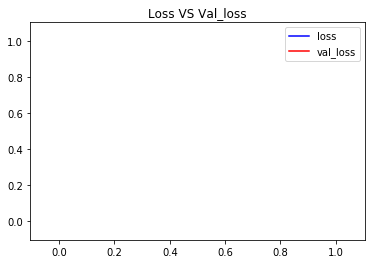

In [111]:
Epochs = 10
Batch_size =32
History = model.fit(x_train, y_train, batch_size=Batch_size, epochs=Epochs, callbacks=[model_checkpoint], validation_data=(x_val, y_val))

# Overfitting Observation
loss = History.history['loss']
val_loss = History.history['val_loss']
E = [i for i in range(Epochs)]
plt.plot(E, loss,'b-',label='loss')
plt.plot(E, val_loss,'r-',label='val_loss')
plt.legend()
plt.title('Loss VS Val_loss')

# Prediction
model.load_weights('./500-GCGRU4')
result = model.evaluate(x_test, y_test)
print(result)

In [40]:
[0.6703451871871948, 0.5436618328094482]
[0.6767670512199402, 0.5437079071998596]
[nan, 0.5647242069244385]

[0.6767670512199402, 0.5437079071998596]